<a href="https://colab.research.google.com/github/preranachandania/Decision-tree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [7]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [8]:
import os

dataset_path = r"/content/Book1.1.csv"  # Replace with your actual dataset path

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
data ="/content/Book1.1.csv"

df = pd.read_csv(data, header=None)


In [11]:
df.shape

(4425, 13)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs
1,1,8,5,2,1,1,1,13,10,6,10,1,0
2,1,6,1,11,1,1,1,1,3,4,4,1,0
3,1,1,5,5,1,1,1,22,27,10,10,1,0
4,1,8,2,15,1,1,1,23,27,6,4,1,0


In [13]:
col_names = ['Marital status', 'Application mode', 'Application order', 'Course','Daytime/evening attendance', 'Previous qualification', 'Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs']


df.columns = col_names

col_names

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 'Mothers qualification',
 'Fathers qualification',
 'Mothers occupation',
 'Fathers occupation',
 'Displaced',
 'Educational special needs']

In [14]:
# let's again preview the dataset

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Educational special needs
0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs
1,1,8,5,2,1,1,1,13,10,6,10,1,0
2,1,6,1,11,1,1,1,1,3,4,4,1,0
3,1,1,5,5,1,1,1,22,27,10,10,1,0
4,1,8,2,15,1,1,1,23,27,6,4,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital status              4425 non-null   object
 1   Application mode            4425 non-null   object
 2   Application order           4425 non-null   object
 3   Course                      4425 non-null   object
 4   Daytime/evening attendance  4425 non-null   object
 5   Previous qualification      4425 non-null   object
 6   Nacionality                 4425 non-null   object
 7   Mothers qualification       4425 non-null   object
 8   Fathers qualification       4425 non-null   object
 9   Mothers occupation          4425 non-null   object
 10  Fathers occupation          4425 non-null   object
 11  Displaced                   4425 non-null   object
 12  Educational special needs   4425 non-null   object
dtypes: object(13)
memory usage: 449.5+ KB


In [16]:
col_names = ['Marital status', 'Application mode', 'Application order', 'Course','Daytime/evening attendance', 'Previous qualification', 'Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs']


for col in col_names:

    print(df[col].value_counts())

1                 3919
2                  379
4                   91
5                   25
6                    6
3                    4
Marital status       1
Name: Marital status, dtype: int64
1                   1708
8                    872
12                   785
14                   312
15                   213
4                    139
9                    124
13                    77
16                    59
7                     38
17                    35
6                     30
3                     16
5                     10
2                      3
10                     1
Application mode       1
18                     1
11                     1
Name: Application mode, dtype: int64
1                    3026
2                     547
3                     309
4                     249
5                     154
6                     137
Application order       1
9                       1
0                       1
Name: Application order, dtype: int64
12        766
9     

In [17]:
df['Application order'].value_counts()

1                    3026
2                     547
3                     309
4                     249
5                     154
6                     137
Application order       1
9                       1
0                       1
Name: Application order, dtype: int64

In [18]:
# check missing values in variables

df.isnull().sum()

Marital status                0
Application mode              0
Application order             0
Course                        0
Daytime/evening attendance    0
Previous qualification        0
Nacionality                   0
Mothers qualification         0
Fathers qualification         0
Mothers occupation            0
Fathers occupation            0
Displaced                     0
Educational special needs     0
dtype: int64

In [19]:
X = df.drop(['Application order'], axis=1)

y = df['Application order']

In [20]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2964, 12), (1461, 12))

In [22]:
# check data types in X_train

X_train.dtypes

Marital status                object
Application mode              object
Course                        object
Daytime/evening attendance    object
Previous qualification        object
Nacionality                   object
Mothers qualification         object
Fathers qualification         object
Mothers occupation            object
Fathers occupation            object
Displaced                     object
Educational special needs     object
dtype: object

In [23]:
X_train.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Educational special needs
258,1,8,5,1,1,1,22,27,10,10,0,0
3471,1,1,12,1,1,1,23,14,8,10,1,0
386,1,1,10,1,1,1,19,24,1,1,0,0
847,2,12,17,0,1,1,1,1,32,23,0,0
4422,1,1,12,1,1,1,22,27,10,10,1,0


In [24]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [36]:
# encode variables with ordinal encoding


encoder = ce.OrdinalEncoder(cols=['Marital status', 'Application mode', 'Course','Daytime/evening attendance', 'Previous qualification', 'Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs'])



In [37]:
X_train = encoder.fit_transform(X_train)


In [38]:
X_test = encoder.transform(X_test)

In [39]:
X_train.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Educational special needs
258,1,1,1,1,1,1,1,1,1,1,1,1
3471,1,2,2,1,1,1,2,2,2,1,2,1
386,1,2,3,1,1,1,3,3,3,2,1,1
847,2,3,4,2,1,1,4,4,4,3,1,1
4422,1,2,2,1,1,1,1,1,1,1,2,1


In [44]:
X_test.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,Educational special needs
1257,1.0,1.0,3.0,1.0,1.0,1.0,7.0,5.0,9.0,8.0,2.0,1.0
2572,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,2.0,1.0
3741,1.0,10.0,7.0,1.0,1.0,1.0,6.0,4.0,7.0,7.0,1.0,1.0
1068,1.0,2.0,10.0,1.0,1.0,1.0,1.0,5.0,7.0,9.0,1.0,1.0
1732,1.0,2.0,15.0,1.0,1.0,1.0,7.0,2.0,8.0,5.0,2.0,1.0


In [45]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [46]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
y_pred_gini = clf_gini.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6872


In [49]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6822


In [51]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6822
Test set score: 0.6872


[Text(0.5, 0.875, 'x[10] <= 1.5\ngini = 0.509\nsamples = 2964\nvalue = [1, 2022, 373, 204, 169, 100, 94, 1]'),
 Text(0.25, 0.625, 'x[1] <= 2.5\ngini = 0.222\nsamples = 1337\nvalue = [0, 1175, 90, 31, 19, 12, 9, 1]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\ngini = 0.353\nsamples = 531\nvalue = [0, 423, 48, 26, 14, 11, 9, 0]'),
 Text(0.0625, 0.125, 'gini = 0.469\nsamples = 162\nvalue = [0, 115, 21, 15, 6, 2, 3, 0]'),
 Text(0.1875, 0.125, 'gini = 0.296\nsamples = 369\nvalue = [0, 308, 27, 11, 8, 9, 6, 0]'),
 Text(0.375, 0.375, 'x[2] <= 16.5\ngini = 0.127\nsamples = 806\nvalue = [0, 752, 42, 5, 5, 1, 0, 1]'),
 Text(0.3125, 0.125, 'gini = 0.11\nsamples = 783\nvalue = [0, 738, 33, 5, 5, 1, 0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.476\nsamples = 23\nvalue = [0, 14, 9, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[1] <= 2.5\ngini = 0.673\nsamples = 1627\nvalue = [1, 847, 283, 173, 150, 88, 85, 0]'),
 Text(0.625, 0.375, 'x[2] <= 2.5\ngini = 0.747\nsamples = 1192\nvalue = [0, 497, 238, 155, 138, 85, 79, 0]')

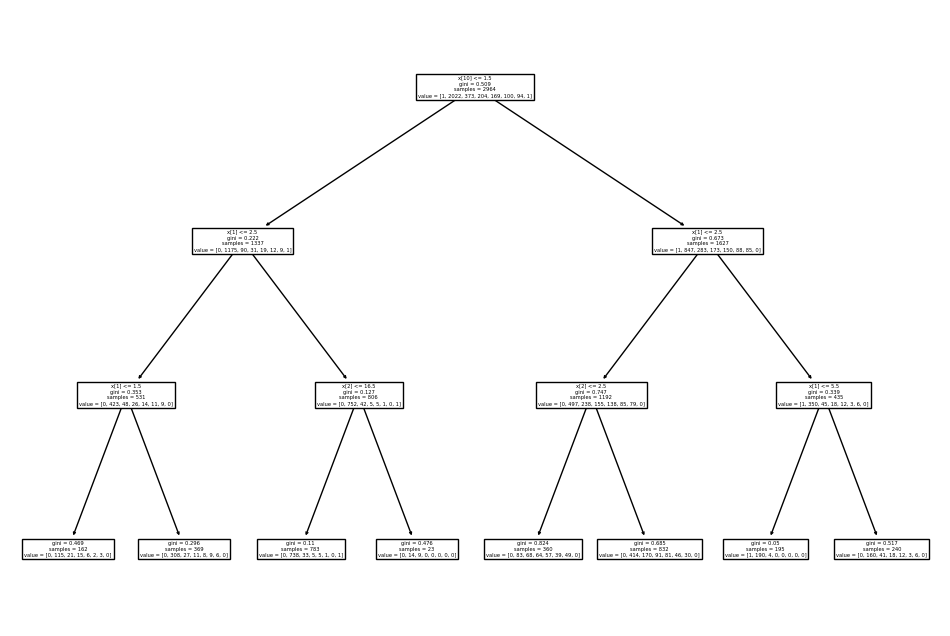

In [52]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

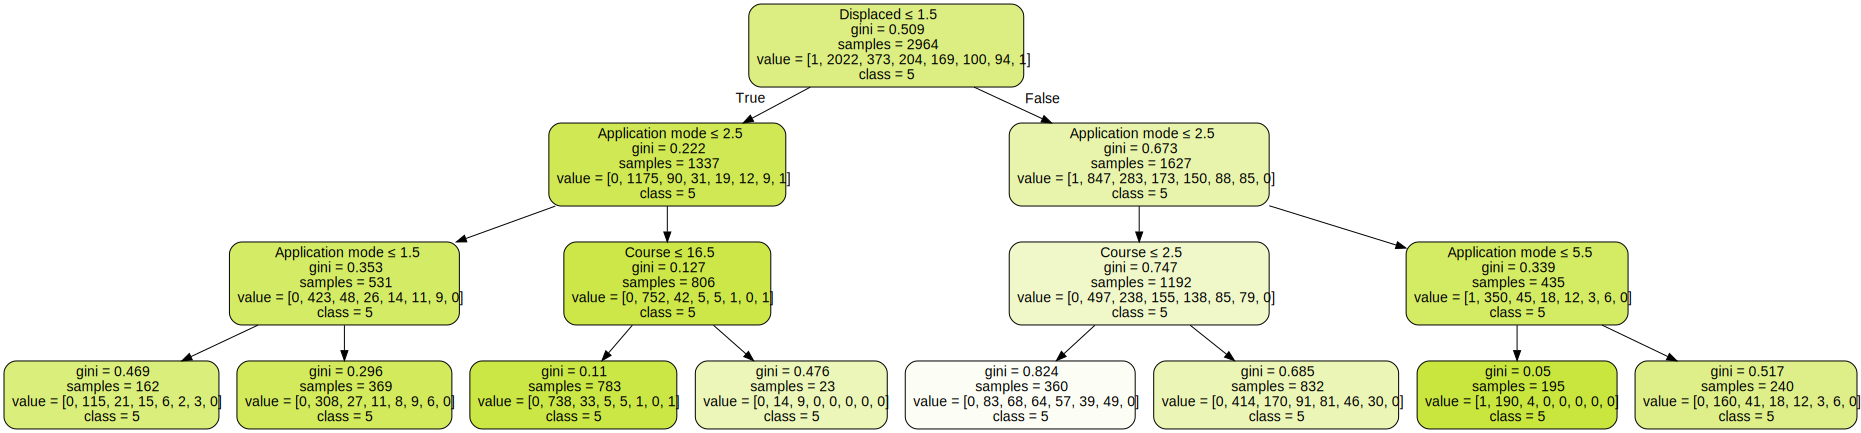

In [53]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [54]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [55]:
y_pred_en = clf_en.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6872


In [57]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [58]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.6822


In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6822
Test set score: 0.6872


[Text(0.5, 0.875, 'x[1] <= 2.5\nentropy = 1.585\nsamples = 2964\nvalue = [1, 2022, 373, 204, 169, 100, 94, 1]'),
 Text(0.25, 0.625, 'x[10] <= 1.5\nentropy = 2.015\nsamples = 1723\nvalue = [0, 920, 286, 181, 152, 96, 88, 0]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\nentropy = 1.142\nsamples = 531\nvalue = [0, 423, 48, 26, 14, 11, 9, 0]'),
 Text(0.0625, 0.125, 'entropy = 1.412\nsamples = 162\nvalue = [0, 115, 21, 15, 6, 2, 3, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.992\nsamples = 369\nvalue = [0, 308, 27, 11, 8, 9, 6, 0]'),
 Text(0.375, 0.375, 'x[2] <= 2.5\nentropy = 2.264\nsamples = 1192\nvalue = [0, 497, 238, 155, 138, 85, 79, 0]'),
 Text(0.3125, 0.125, 'entropy = 2.545\nsamples = 360\nvalue = [0, 83, 68, 64, 57, 39, 49, 0]'),
 Text(0.4375, 0.125, 'entropy = 2.049\nsamples = 832\nvalue = [0, 414, 170, 91, 81, 46, 30, 0]'),
 Text(0.75, 0.625, 'x[1] <= 5.5\nentropy = 0.693\nsamples = 1241\nvalue = [1, 1102, 87, 23, 17, 4, 6, 1]'),
 Text(0.625, 0.375, 'x[2] <= 16.5\nentropy = 0.3\nsamples = 763

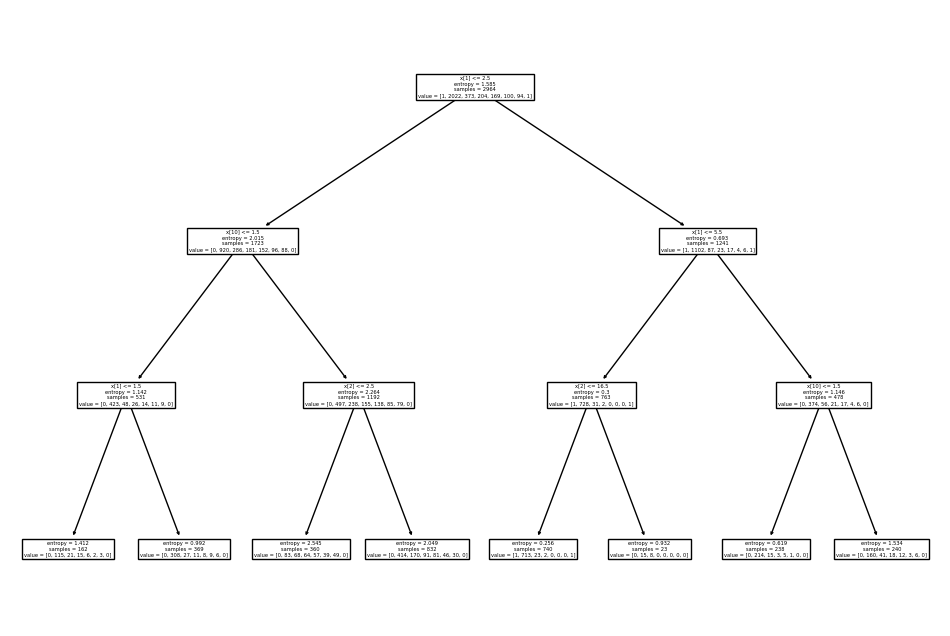

In [60]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

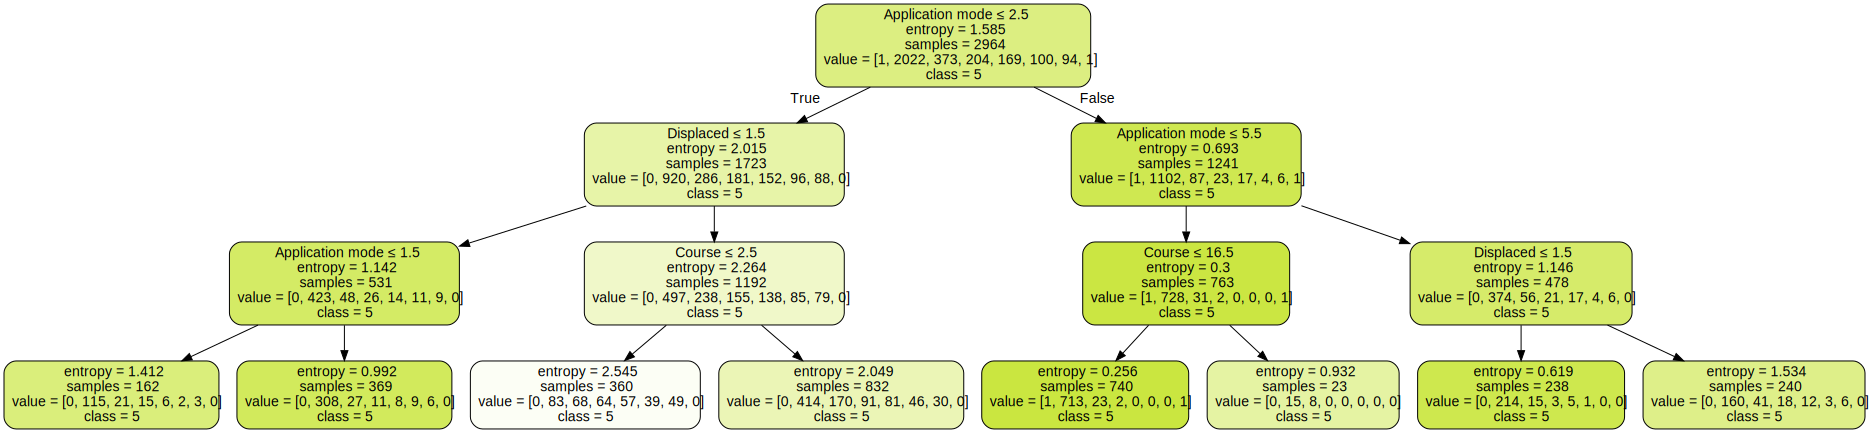

In [61]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [62]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1004    0    0    0    0    0    0]
 [ 174    0    0    0    0    0    0]
 [ 105    0    0    0    0    0    0]
 [  80    0    0    0    0    0    0]
 [  54    0    0    0    0    0    0]
 [  43    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0]]


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                   precision    recall  f1-score   support

                1       0.69      1.00      0.81      1004
                2       0.00      0.00      0.00       174
                3       0.00      0.00      0.00       105
                4       0.00      0.00      0.00        80
                5       0.00      0.00      0.00        54
                6       0.00      0.00      0.00        43
Application order       0.00      0.00      0.00         1

         accuracy                           0.69      1461
        macro avg       0.10      0.14      0.12      1461
     weighted avg       0.47      0.69      0.56      1461

